# Исследование надежности заемщиков.

Заказчик — кредитный отдел банка. 

Входные данные от банка — статистика о платёжеспособности клиентов.

**Цель исследования** — проверить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

**Ход исследования**

Данные о платежоспособности получим из файла `data.csv`. О качестве данных известно, что, как минимум, имеется множество пропусков, поэтому понадобится обзор данных. 

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ.


##  Обзор данных

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
df = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/data.csv') # чтение файла с данными и сохранение в df

Выведим на экран первые десять строк таблицы:

In [3]:
display(df.head(10)) # получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Одной командой получим общую информацию о данных таблицы:

In [4]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов. Тип данных в столбцах — `object`, `int64`, `float64`.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения.
* `gender` — пол клиента;
* `income_type` — тип занятости;  
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита;



Количество значений в двух столбцах отличаются от остальных: `days_employed`, `total_income`. Значит, в данных есть пропущенные значения. Также можно заметить отрицательные значения столбца `days_employed`, причину которых нужно выяснить.


**Выводы**

Часть данных таблицы описывают "стартовую" информацию о клиенте: образование, семейное положение и гендер. Другая часть посвящена трудовой истории: тип занятости, доход, стаж. Третья же - сведениям по кредитной части вопроса: наличие задолженностей, цель получения кредита. 

Предварительно можно утверждать, что, данных достаточно для исследования. Но встречаются пропуски, а в определенном столбце — аномальные значения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

##  Предобработка данных

###  Определение и заполнение пропусков.

Проверим дествительно ли есть пропуски и в каких столбцах конкретно:

In [5]:
df.isna().sum() # подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Подтвердилось, что пропуски находятся в стоблцах `days_employed` и `total_income`.

Оценим долю пропущенных значений в каждом столбце с пропусками:

In [6]:
share_days_employed = df['days_employed'].isna().sum() / df.shape[0] #доля пропусков в столбце days_employed
share_total_income = df['total_income'].isna().sum() / df.shape[0] #доля пропусков в столбце total_income
total_share = share_days_employed + share_total_income #общая доля пропусков 
print(f'Количество пропущенных значений в каждом из столбцов: {share_total_income:.0%}')
print(f'Количество пропущенных значений относительно всего датафрейма: {total_share:.0%}')

Количество пропущенных значений в каждом из столбцов: 10%
Количество пропущенных значений относительно всего датафрейма: 20%


Целых 20% всей таблицы относятся к пропускам. 
Возможно такой большой процент упущенных данных связан с нежеланием пользователей делиться подобной информацией в конкрентный момент, ибо она может повлиять на одобрение кредита. Однако, это может быть связано еще и с какой технической ошибкой внутри системы. 

Значения этих метрик (где были найдены пропуски) относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений одного из столбцов следующим образом:

In [7]:
max_t = df['total_income'].max()  #считаем минимальные и максимальные значения столбцов
min_t = df['total_income'].min()

print(f'Максимальное значение столбца total_income: {int(max_t):}')
print(f'Минимальное значение столбца total_income: {int(min_t):}')

Максимальное значение столбца total_income: 2265604
Минимальное значение столбца total_income: 20667


Ввиду большого размаха выбороки целесообразно заполнять пропуски именно медианой, ибо присутствуют выдающиеся значения, которые при подсчете среднего арифметического создадут ложные впечатления о данных. 

Не просто заполним пропуски медианой, предварительно сделаем группировку по типу дохода и выясним какой медианный доход у каждой подкатегории:

In [8]:
income_ti = df.groupby('income_type')['total_income'].median() #группируем данные по income_type
print(income_ti)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64


Напишем код, который будет заполнять пропуски в зависимости от типа дохода:

In [9]:
data_transformed = df.groupby('income_type')['total_income'].transform('median')
df['total_income'] = df['total_income'].fillna(data_transformed)

Проверим остались ли пропуски:

In [10]:
df['total_income'].isna().sum() # подсчёт пропусков

0

### Проверка данных на аномалии и исправления.

Теперь займемся заполнением пропусков в столбце `days_employed`, предварительно изучив выборку:

In [11]:
max_d = df['days_employed'].max()
min_d = df['days_employed'].min()

print(f'Максимальное значение столбца days_employed: {int(max_d):}')
print(f'Минимальное значение столбца days_employed: {int(min_d):}')

Максимальное значение столбца days_employed: 401755
Минимальное значение столбца days_employed: -18388


Избавимся от отрицательных значений:

In [12]:
days_employed = df['days_employed']
days_employed_ok = []
for days in days_employed:
    if days < 0:
        days *= -1
        days_employed_ok.append(days)
    else:
        days_employed_ok.append(days)
df['days_employed'] = days_employed_ok 
max_d = df['days_employed'].max()
min_d = df['days_employed'].min()
print(f'Максимальное значение столбца days_employed в годах: {int(max_d) / 365 :}')
print(f'Минимальное значение столбца days_employed в годах: {int(min_d) / 365 :}')

Максимальное значение столбца days_employed в годах: 1100.6986301369864
Минимальное значение столбца days_employed в годах: 0.06575342465753424


С данными явно что-то не так,не говоря уже о пропусках, ибо максимумом выборки является около 1100, что невозможно для человека))
Исходя из цели исследования, `days_employed` не будет особо использован, поэтому есть смысл его удалить. 

In [13]:
df.drop(['days_employed'], axis = 1, inplace=True)

Проверим остальные столбцы на аномалии:

In [14]:
max_ch = df['children'].max() #оценим max и min выборки колонки children
min_ch = df['children'].min()
print(f'Максимальное значение столбца children: {max_ch:}')
print(f'Минимальное значение столбца children: {min_ch:}')
df['children'].sort_values().unique() #уникальные значения в порядке возрастания, чтобы посмотреть на всю выборку

Максимальное значение столбца children: 20
Минимальное значение столбца children: -1


array([-1,  0,  1,  2,  3,  4,  5, 20])

В столбце `children` были найдены некорректные значения, высчитаем долю аномалий.

In [15]:
print(len(df['children']) / df.shape[0])

1.0


In [16]:
df.drop(['children'], axis = 1, inplace=True)

Ближе рассмотрим столбец `dob_years`:

In [17]:
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Нам снова встретилось аномальное значение (0 в возрасте клиентов), попробуем посмотреть поближе на строки с нулевыми значениями:

In [18]:
df[df['dob_years'] == 0]

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...
19829,0,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,жилье
20462,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


Очень много строк имеют нулевые значения в этом столбце, данное значение можно воспринимать, как очередной пропуск, поэтому заменим ноль на медианный возраст клиентов по их доходу (через группировку и цикл):

In [19]:
income_ty = df.pivot_table(index='income_type', values = 'dob_years', aggfunc = 'median')
display(income_ty)

,dob_years
income_type,
безработный,38.0
в декрете,39.0
госслужащий,40.0
компаньон,39.0
пенсионер,60.0
предприниматель,42.5
сотрудник,39.0
студент,22.0


In [20]:
for income in df[df['dob_years'] == 0]['income_type']:
        df['dob_years'] = df['dob_years'].replace(0, income_ty.loc[income, 'dob_years'])

Проверим остались ли нулевые значения в таблице:

In [21]:
df[df['dob_years'] == 0]

,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


### Изменение типов данных.

Для упрощения исследования округлим значения столбца `total_income`, так как дробные значения просто несущественны и лишь мешают, поэтому их лучше отбросить, поменяв тип данных. Также подправим данные, которые ввиду замен перешли с `int` к `float`:

In [22]:
for column in list(df.columns):
    if df.dtypes[column] == 'float64':
        df[column] = df[column].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dob_years         21525 non-null  int64 
 1   education         21525 non-null  object
 2   education_id      21525 non-null  int64 
 3   family_status     21525 non-null  object
 4   family_status_id  21525 non-null  int64 
 5   gender            21525 non-null  object
 6   income_type       21525 non-null  object
 7   debt              21525 non-null  int64 
 8   total_income      21525 non-null  int64 
 9   purpose           21525 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.6+ MB


### Определение и удаление дубликатов.

#### Неявные дубликаты.

Проверим все столбцы типа `object` на неявные дубликаты: `education`, `family_status`, `gender`, `income_type`, `purpose`.          

##### Колонка  `education`

In [23]:
df['education'].sort_values().unique() # Просмотр уникальных значений 

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

Ввиду разных регистров мы можем видеть дубликаты, приведем все значения к нижнему регистру и вновь посмотрим на уникальные значения столбца:

In [24]:
df['ed_lowercase'] = df['education'].str.lower()

In [25]:
df['ed_lowercase'].sort_values().unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [26]:
df.drop(['education'], axis = 1, inplace=True)

##### Колонка  `family_status`

In [27]:
df['family_status'].sort_values().unique() # Просмотр уникальных значений 

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

Дубликатов не было обнаружено, рассмотрим следующую.

##### Колонка  `gender`

In [28]:
df['gender'].sort_values().unique() # Просмотр уникальных значений 

array(['F', 'M', 'XNA'], dtype=object)

Через просмотр уникальных значений нашли пропуски, но указаны они в качестве строки. Посмотрим сколько строк содержат 'XNA':

In [29]:
df[df['gender'] == 'XNA'] #ищем строки, которые соотвествуют условию

,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,ed_lowercase
10701,24,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,неоконченное высшее


Всего лишь одна строка имеет пропуск в этом столбце, поэтому целесообразно ее удалить (несущественна для анализа):

In [30]:
df = df[df['gender'] != 'XNA'] #придаем датафрейму новое значения, гда строка с пропуском отсутствует
df['gender'].sort_values().unique() #проверяем уникальность значений

array(['F', 'M'], dtype=object)

##### Колонка  `income_type`

In [31]:
df['income_type'].sort_values().unique() # Просмотр уникальных значений 

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

Дубликатов не было обнаружено, перейдем к следующей колонке.

##### Колонка  `purpose`

In [32]:
df['purpose'].sort_values().unique() # Просмотр уникальных значений 

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

Можно увидить очень много дубликат, в отделе категоризации поближе поработаем с данными и обобщим все одинаковые значения. 

#### Явные дубликаты.

Для начала проверим данные на явные дубликаты:

In [33]:
df.duplicated().sum() #подсчет явных дубликатов

110

Удалим все явные дубликаты из данных:

In [34]:
df = df.drop_duplicates().reset_index(drop=True)# удаление явных дубликатов (с удалением старых индексов и формированием новых)

Ещё раз посчитаем явные дубликаты в таблице — убедимся, что полностью от них избавились:

In [35]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

**Выводы**

Предобработка обнаружила три проблемы в данных:

- аномальные значения,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы заполнили пропуски и исключили аномальные значения, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.


Теперь можно перейти к анализу. 

##  Анализ 

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим отдельные датафреймы, которые упростят работу с таблицей:

In [36]:
#создаем словарь со значениями 
ed_dict = {
    'education' : ['высшее', 'начальное', 'неоконченное высшее', 'среднее','ученая степень'],
    'education_id': [
        df[df['ed_lowercase'] == 'высшее']['education_id'].unique()[0],
        df[df['ed_lowercase'] == 'начальное']['education_id'].unique()[0],
        df[df['ed_lowercase'] == 'неоконченное высшее']['education_id'].unique()[0],
        df[df['ed_lowercase'] == 'среднее']['education_id'].unique()[0],
        df[df['ed_lowercase'] == 'ученая степень']['education_id'].unique()[0]
    ]
}
#формируем датафрейм
df_ed = pd.DataFrame(ed_dict).sort_values('education_id').reset_index(drop=True)
display(df_ed)

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [37]:
#создаем словарь со значениями 
fam_dict = {
    'family_status' : ['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'],
    'family_status_id': [
        df[df['family_status'] == 'Не женат / не замужем']['family_status_id'].unique()[0],
        df[df['family_status'] == 'в разводе']['family_status_id'].unique()[0],
        df[df['family_status'] == 'вдовец / вдова']['family_status_id'].unique()[0],
        df[df['family_status'] == 'гражданский брак']['family_status_id'].unique()[0],
        df[df['family_status'] == 'женат / замужем']['family_status_id'].unique()[0]
    ]
}
#формируем датафрейм
df_fam = pd.DataFrame(fam_dict).sort_values('family_status_id').reset_index(drop=True)
display(df_fam)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Удалим ненужные уже нам столбцы из исходной таблицы: `ed_lowercase` и `family_status`

In [38]:
df.drop(['ed_lowercase','family_status'], axis = 1, inplace=True)

Посмотрим насколько изменилась таблица:

In [39]:
display(df.head())

,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,42,0,0,F,сотрудник,0,253875,покупка жилья
1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,33,1,0,M,сотрудник,0,145885,покупка жилья
3,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация.

#### Категоризация дохода.

Разобьем доходы клииентов на категории, чтобы было удобней делать дальнейший анализ:

In [40]:
#создадим функцию, которая принимает в качестве аргумента значения колонки total_income
def total_income_category(row):
    income_category = row['total_income']
    #через условные операторы разобьем доход на категории
    if income_category <= 3000:
        return 'E'
    elif income_category <= 5000 and income_category >= 3001:
        return 'D'
    elif income_category >= 5001 and income_category <= 200000:
        return 'C'
    elif income_category >= 200001 and income_category <= 1000000:
        return 'B'
    else:
        return 'A'
df['total_income_category'] = df.apply(total_income_category, axis=1)
display(df.head())

,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


#### Категоризация целей.

In [41]:
def replace_wrong_purpose(wrong_purpose, correct_purpose):
    for purposes in wrong_purpose:
        df['purpose'] = df['purpose'].replace(wrong_purpose, correct_purpose)

In [42]:
#создаем словарь с генераторами словарей
purpose = {
    'автомобиль': [x for x in df['purpose'].unique() if 'авто' in x],
    'жилье' : [x for x in df['purpose'].unique() if 'жил' in x],
    'недвижимость' : [x for x in df['purpose'].unique() if 'недвижим' in x],
    'образование' : [x for x in df['purpose'].unique() if 'образ' in x],
    'свадьба' : [x for x in df['purpose'].unique() if 'свадьб' in x]                                               
}
#используем функцию и меняем дубликаты на словосочетания 
replace_wrong_purpose(purpose['автомобиль'], 'покупка автомобиля')
replace_wrong_purpose(purpose['жилье'], 'приобритение жилья')
replace_wrong_purpose(purpose['недвижимость'], 'приобритение жилья')
replace_wrong_purpose(purpose['образование'], 'получение образования')
replace_wrong_purpose(purpose['свадьба'], 'проведение свадьбы')

Проверим остались ли дубликаты:

In [43]:
df['purpose'].sort_values().unique()

array(['покупка автомобиля', 'получение образования',
       'приобритение жилья', 'проведение свадьбы'], dtype=object)

### Ответы на вопросы.

Оценим в целом сколько клиентов в процентом соотношении выплачивают кредит вовремя или наоборот:

In [44]:
debt_bad = df[df['debt'] == 1]['debt'].count() / len(df['debt'])
debt_good = df[df['debt'] == 0]['debt'].count() / len(df['debt'])
print(f'Количество кредитов, выплаченных не в срок: {debt_bad:.0%}')
print(f'Количество кредитов, выплаченных в срок: {debt_good:.0%}')

Количество кредитов, выплаченных не в срок: 8%
Количество кредитов, выплаченных в срок: 92%


##### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?

Ввиду того, что мы удалили столбце `children`, на вопрос невозможно ответить.

##### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [45]:
df_fams = df.pivot_table(index=['family_status_id'], values='debt', aggfunc=['sum','count', 'mean'])
df_fams.columns = ['sum', 'count', 'mean']
display(df_fams.head())

,sum,count,mean
family_status_id,,,
0,931,12311,0.075623
1,388,4141,0.093697
2,63,959,0.065693
3,85,1195,0.071130
4,274,2808,0.097578


Изобразим данные через гистограммы и посмотрим, как мы их можем соотнести:

<AxesSubplot:>

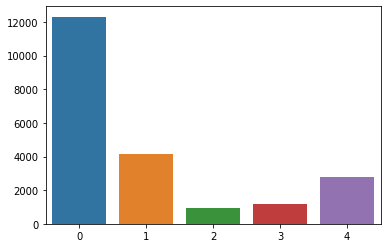

In [46]:
import seaborn as sb
sb.barplot(y = list(df_fams['count']), x = [0, 1, 2, 3, 4])

<AxesSubplot:>

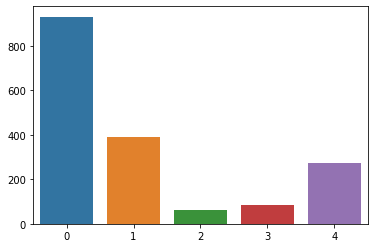

In [47]:
sb.barplot(y = list(df_fams['sum']), x = [0, 1, 2, 3, 4])

К сожалению, из этих графиков можно понять лишь присутствие связи, но никак не ее особенность, поэтому посчитаем соотношения одной строки к другой и изобразим:

<AxesSubplot:>

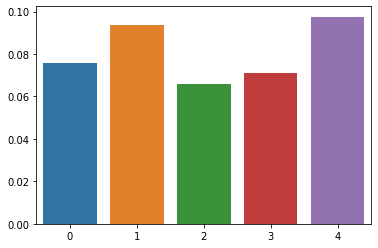

In [48]:
sb.barplot(y = list(df_fams['mean']), x = [0, 1, 2, 3, 4])

Можем заметить, что у похожих категорий одинаковые процентные соотношения. Так, например, 1 и 4, гражданский брак и не замужем/не женат. Связь определенно имеется, и она нам говорит о том, что просрочка для, например, людей в разводе/ вдовцов в среднем одинакова низка относительно всех категорий. 

##### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?


In [49]:
df_money = df.pivot_table(index=['total_income_category'], values = 'debt', aggfunc=['sum','count', 'mean'])
df_money.columns = ['sum', 'count', 'mean']
display(df_money.head())

,sum,count,mean
total_income_category,,,
A,2,25,0.080000
B,356,5041,0.070621
C,1383,16348,0.084598


Изобразим данные через гистограммы и посмотрим, как мы их можем соотнести:

<AxesSubplot:>

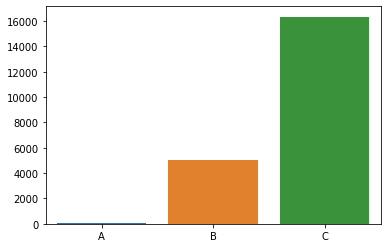

In [50]:
sb.barplot(y= list(df_money['count']), x = ['A', 'B', 'C'])

<AxesSubplot:>

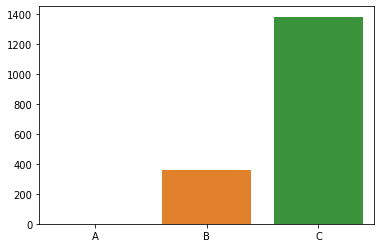

In [51]:
sb.barplot(y= list(df_money['sum']), x = ['A', 'B', 'C'])

К сожалению, из этих графиков можно понять лишь присутствие связи, но никак не ее особенность, поэтому посчитаем соотношения одной строки к другой и изобразим:

<AxesSubplot:>

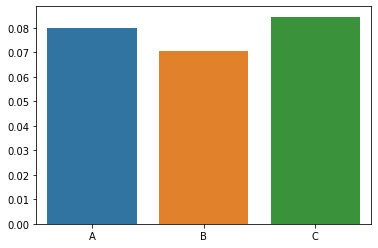

In [52]:
sb.barplot(y= list(df_money['mean']), x = ['A', 'B', 'C'])

В среднем риск просрочки кредитов снижается для клиентов с категорией дохода В и увеличивается для категории С.

##### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?

In [53]:
df_purp = df.pivot_table(index='purpose', values = 'debt', aggfunc=['sum','count', 'mean'])
df_purp.columns = ['sum', 'count', 'mean']
display(df_purp.head())

,sum,count,mean
purpose,,,
покупка автомобиля,403,4301,0.093699
получение образования,370,4002,0.092454
приобритение жилья,782,10795,0.072441
проведение свадьбы,186,2316,0.080311


Изобразим данные через графики и посмотрим, как мы их можем соотнести:

<AxesSubplot:>

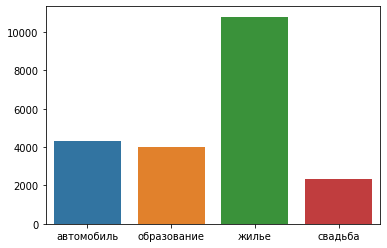

In [54]:
sb.barplot(y = list(df_purp['count']) , x = ['автомобиль', 'образование', 'жилье', 'свадьба'])

<AxesSubplot:>

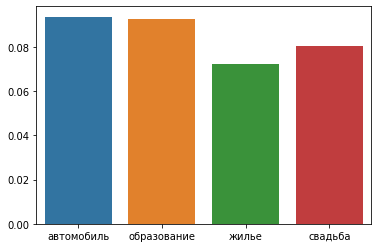

In [55]:
sb.barplot(y = list(df_purp['mean']), x = ['автомобиль', 'образование', 'жилье', 'свадьба'])

К сожалению, из этих графиков можно понять лишь присутствие связи, но никак не ее особенность, поэтому посмотрим на график соотношений одной строки к другой:

<AxesSubplot:>

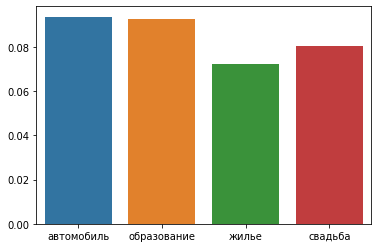

In [56]:
sb.barplot(y= list(df_purp['mean']), x = ['автомобиль', 'образование', 'жилье', 'свадьба'])

Риск просрочки кредита уменьшается для клиентов с целью приобритения жилья и увеличивается, когда клиенты хотят купить автомобиль или получить образование. 

## Общий вывод:

**Обзор данных**:
   - Данные о платежоспособности получили из файла `data.csv`.
   - Предварительно качество данных было несильно высокого уровня из-за наличия аномальных значений, дубликатов и пропусков.
   - Сами данные представляли из себя сводку личной и платежной информации о клиенте.


**Предобработка**:
   - Были удалены неявные и явные дубликаты.
   - Также заполнили пропуски и обработали аномальные значения.
   - Кроме того, сделали категоризацию данных, чтобы упростить работу с таблицей.

**Анализ**:
   - Цель исследования была выполнена: мы узнали как связаны риск просрочки кредита по отношению к семейному положению клиента - у похожих категорий одинаковый риск приобритения задолженности. Например, для людей в разводе/ вдовцов в среднем одинакова низка относительно всех категорий.
   - Рассмотрели и другие зависимости: риск просрочки с доходом клиентов и целью кредита.


**Рекомендации по формировании кредитного скоринга**:
   - Лучше отдавать предпочтения людям в разводе/вдовцов при выдаче кредита, ибо среди категорий семейного положения их коэффициент просрочки наименьший. 
   - Клиенты с доходом типа B менее подвержены к приобретению и задолженности по кредиту, в то время как клиенты типа С имеют склонность к просрочке.
   - Риск просрочки кредита уменьшается для клиентов с целью приобритения жилья и увеличивается, когда клиенты хотят купить автомобиль или получить образование.